## 

In [89]:
suppressMessages(suppressWarnings(library (tidyverse)))

selected_genes = c(
    ## target genes (round 1)
    'MTF1','MCL1',
    # 'CYLD','APLP2',
    ## target genes (round 2)
    'SQLE','INTS5',
    # ## 'WP_PATHWAYS_AFFECTED_IN_ADENOID_CYSTIC_CARCINOMA':
    # # 'KMT2C','FBXW7','BCOR','ARID5B','PTEN','NOTCH1','ATM','PIK3CA',
    # 'ARID4B','ATRX','BCORL1',
    # ## 'MIR3925_3P'
    # 'FLAD1',
    # 'MEIS2',
    # 'MARCKS',
    # 'NFE2L1',
    # 'MAP3K3',
    # 'C22orf46',
    # 'UBXN4',
    # 'CELF2',
    # ## two more :)
    'BCL2',
    'DHODH',
    'PTEN',
    'MYBBP1A'
)

read.table('hl60_delta_mtyl_table.txt',sep='\t',header=TRUE) %>% 
    dplyr::filter(name %in% selected_genes) %>% 
    dplyr::select(chr, name,ensembl,start,end,logFC,p_value) %>% 
    arrange (name, desc(abs(logFC)),p_value)

chr,name,ensembl,start,end,logFC,p_value
<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>
chr18,BCL2,ENSG00000171791.13,63127633,63127682,-1.6190688,1.442072e-03
chr18,BCL2,ENSG00000171791.13,63318783,63318832,1.5450428,3.014862e-03
chr16,DHODH,ENSG00000102967.12,72024677,72024726,4.9767337,6.322833e-05
chr11,INTS5,ENSG00000185085.2,62649635,62649684,3.2958369,3.832111e-04
chr11,INTS5,ENSG00000185085.2,62647794,62647843,1.0576988,6.092647e-04
chr1,MCL1,ENSG00000143384.13,150577084,150577133,1.7097645,8.933597e-04
chr1,MCL1,ENSG00000143384.13,150577332,150577381,1.1328455,2.191564e-03
chr1,MCL1,ENSG00000143384.13,150578994,150579043,-0.6120545,8.583863e-04
chr1,MTF1,ENSG00000188786.10,37822305,37822354,5.4553211,9.373189e-07


## Plot Gene and Peak Coverage

### 
`radar` conda env

In [2]:
# %load_ext rpy2.ipython

In [82]:
# %%R 
suppressMessages(suppressWarnings(library (RADAR)))
suppressMessages(suppressWarnings(library (patchwork)))

In [48]:
# %%R
radar0 <- readRDS('radar/finalObj.rds')

In [50]:
# %%R
radar <- PrepCoveragePlot(
    radar0, 
    gtf = '~/genomes//hg38/gencode.v34/gencode.v34.annotation.gtf'
)

assigning new path to gtf file: ~/genomes//hg38/gencode.v34/gencode.v34.annotation.gtf 


In [51]:
radar@bamPath.input = c(
    './align/bam/U1.input.bam',
    './align/bam/U2.input.bam',
    './align/bam/T1.input.bam',
    './align/bam/T2.input.bam'
)

radar@bamPath.ip = c(
    './align/bam/U1.m6A.bam',
    './align/bam/U2.m6A.bam',
    './align/bam/T1.m6A.bam',
    './align/bam/T2.m6A.bam'
)

In [52]:
# %%R 
summary(radar)

MeRIP.RADAR dataset of 4 samples.
Read count quantified in 50-bp consecutive bins on the transcript.
The total read count for Input and IP samples are (Million reads):
         U1    U2    T1    T2
Input 29.95 37.35 33.16 29.93
IP    38.34 36.35 43.09 44.55
Input gene level read count available.
There are 1 predictor variables/covariates. Can access by function variable(MeRIPdata). 
Differential methylation tested by PoissonGamma test (RADAR).
Multiple test corrected by Benjamini & Hochberg.


### [ARID4B](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ARID4B)

In [57]:
%%R 
ZoomIn_peak = c(235181852,235181901 + 30)
geneName <- 'ENSG00000054267.22'
chr <- "chr1"
title <- 'ARID4B'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [58]:
%%R 

p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1],
        ZoomIn_peak[2]
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [59]:
%%R 

p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2], colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

replace the existing scale.



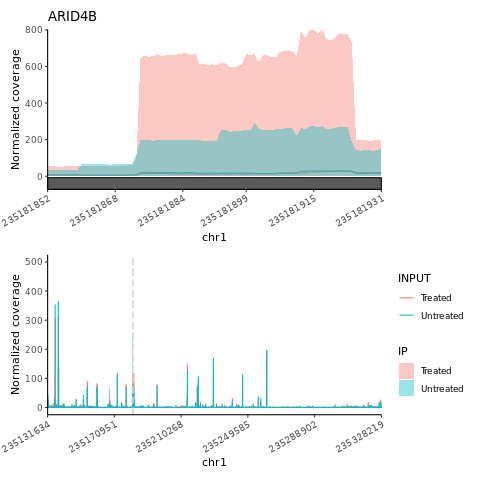

In [60]:
%%R 
p_peak / p_gene

In [61]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [ATRX](https://www.genecards.org/cgi-bin/carddisp.pl?gene=ATRX)


In [62]:
%%R 
ZoomIn_peak = c(77681660,77681709 + 30)
geneName <- 'ENSG00000085224.22'
chr <- "chrX"
title <- 'ATRX'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [63]:
%%R 


p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1],
        ZoomIn_peak[2]
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [64]:
%%R 


p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2] - 1000, colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

replace the existing scale.



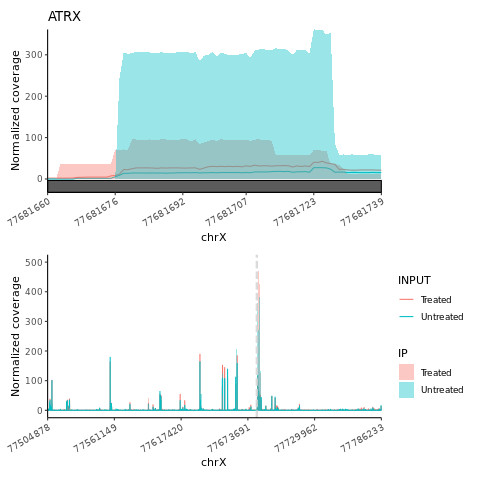

In [66]:
%%R 
p_peak / p_gene

In [67]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [SQLE](https://www.genecards.org/cgi-bin/carddisp.pl?gene=SQLE)

In [110]:
%%R 
ZoomIn_peak = c(124999289, 124999338 + 40)
geneName <- 'ENSG00000104549.12'
chr <- "chr8"
title <- 'SQLE'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [115]:
%%R 
p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1],
        ZoomIn_peak[2]
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [118]:
%%R 



p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2] - 1000, colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

replace the existing scale.



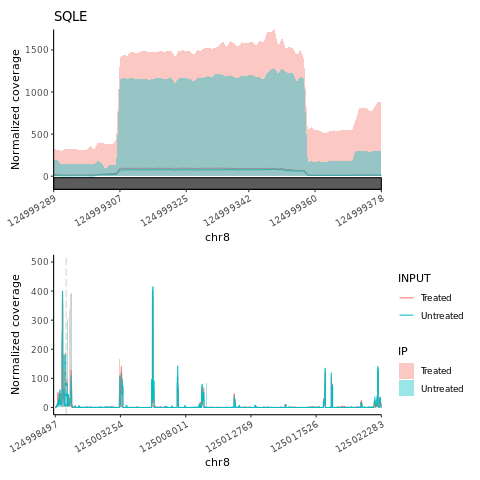

In [119]:
%%R 
p_peak / p_gene

In [120]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [INTS5](https://www.genecards.org/cgi-bin/carddisp.pl?gene=INTS5)

In [122]:
%%R 
ZoomIn_peak = c(62649635,62649684)
geneName <- 'ENSG00000185085.2'
chr <- "chr11"
title <- 'INTS5'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [123]:
%%R 

p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1] - 30,
        ZoomIn_peak[2] - 10
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [124]:
%%R 


p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2], colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

replace the existing scale.



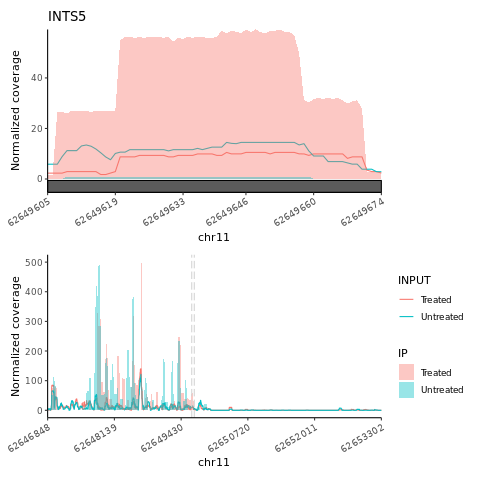

In [125]:
%%R 
p_peak / p_gene

In [126]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [BCL2](https://www.genecards.org/cgi-bin/carddisp.pl?gene=BCL2)

In [6]:
%%R 
ZoomIn_peak = c(63127633,63127682)
geneName <- 'ENSG00000171791.13'
chr <- "chr18"
title <- 'BCL2'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [7]:
%%R 


p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1],# - 30,
        ZoomIn_peak[2] + 20
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [8]:
%%R


p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2], colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax)

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



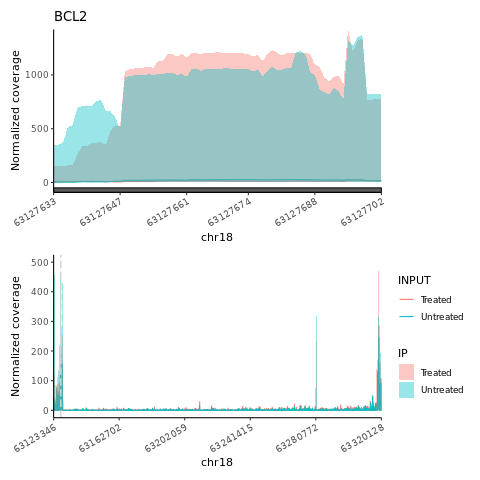

In [9]:
%%R 
p_peak / p_gene

In [10]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [MYBBP1A](https://www.genecards.org/cgi-bin/carddisp.pl?gene=MYBBP1A)

In [11]:
%%R 
ZoomIn_peak = c(4539741,4539790)
geneName <- 'ENSG00000132382.14'
chr <- "chr17"
title <- 'MYBBP1A'
ymax <- 500

gr = radar@GTF[seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName]
ZoomIn_gene = c(start (gr),end (gr))

In [17]:
%%R 

p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1] + 20,
        ZoomIn_peak[2] + 50
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [13]:
%%R 


p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2], colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax) 

R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



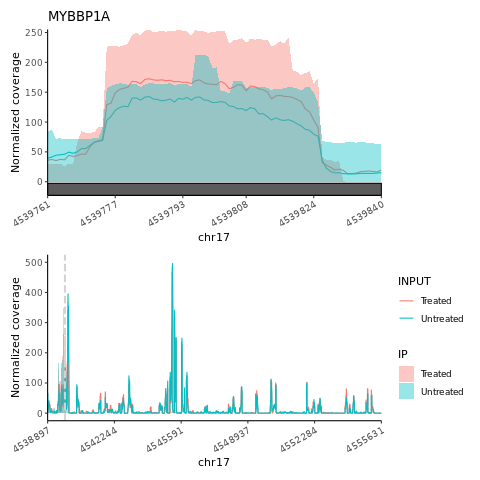

In [18]:
%%R 
p_peak / p_gene

In [19]:
%%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

### [BCORL1](https://www.genecards.org/cgi-bin/carddisp.pl?gene=BCORL1)


### [MCL1](https://www.genecards.org/cgi-bin/carddisp.pl?gene=MCL1)

### [MTF1](https://www.genecards.org/cgi-bin/carddisp.pl?gene=MTF1)


### [PTEN](https://www.genecards.org/cgi-bin/carddisp.pl?gene=PTEN)


In [76]:
# %%R 
ZoomIn_peak = c(87965349,87965598)
geneName <- 'ENSG00000171862.11'
chr <- "chr10"
title <- 'PTEN'
ymax <- 500

gr = radar@GTF[
    seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName
]
ZoomIn_gene = c(start (gr),end (gr))

In [77]:
ZoomIn_peak

[1] 87965349 87965598

In [83]:
# %%R 
p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1] + 20,
        ZoomIn_peak[2]
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [84]:
# %%R
p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2], colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


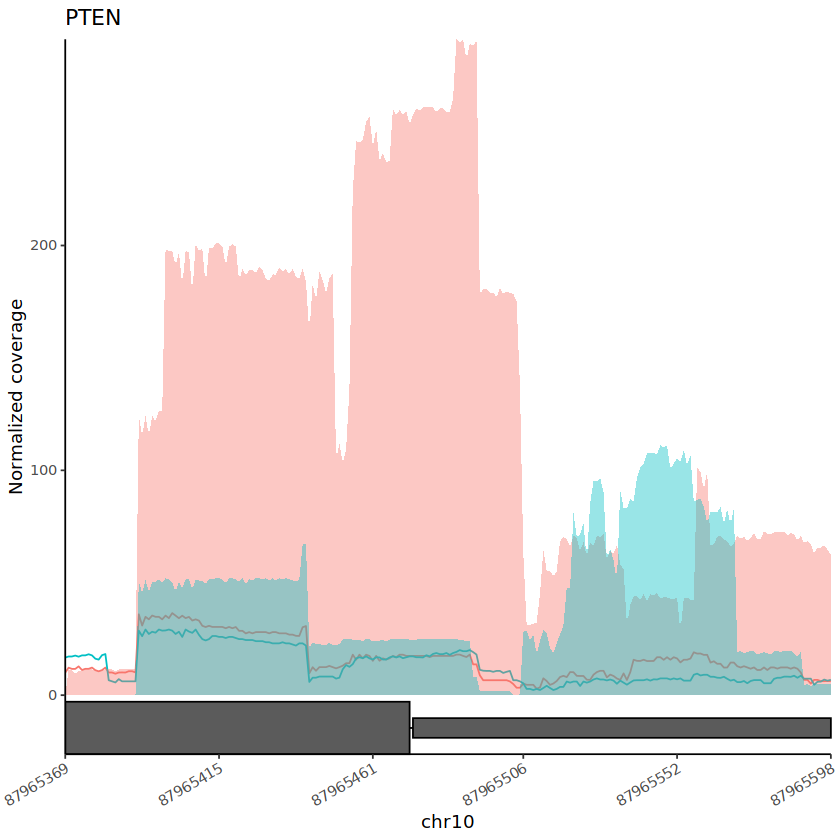

In [85]:
p_peak

Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`

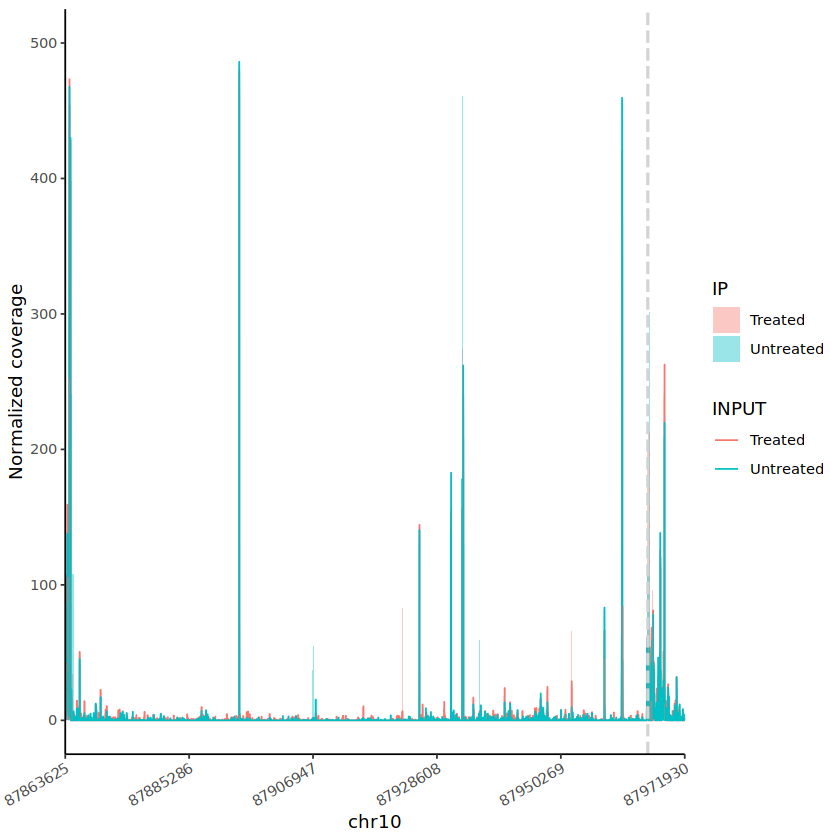

In [86]:
p_gene

In [88]:
# %%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_segment()`

### [DHODH](https://www.genecards.org/cgi-bin/carddisp.pl?gene=DHODH)

In [90]:
# %%R 
ZoomIn_peak = c(72024677,72024726)
geneName <- 'ENSG00000102967.12'
chr <- "chr16"
title <- 'DHODH'
ymax <- 500

gr = radar@GTF[
    seqnames(radar@GTF) == chr & radar@GTF$type == 'gene' & radar@GTF$gene_id == geneName
]
ZoomIn_gene = c(start (gr),end (gr))

In [105]:
# %%R 
p_peak <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = c(
        ZoomIn_peak[1] + 30,
        ZoomIn_peak[2] + 70
    ), adjustExprLevel = T
    #, split = T
) + theme_classic() +
# theme_void() + 
theme(
    legend.position = "none",    
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + ggtitle(title)

In [93]:
# %%R
p_gene <- plotGeneCov(
    radar,geneName = geneName,
    center = mean, libraryType = "opposite",
    ZoomIn = ZoomIn_gene, adjustExprLevel = T
    #, split = T
) + theme_classic() + theme(
    axis.text.x = element_text(angle = 30, vjust = 1,hjust=1)
) + geom_vline(
    xintercept = ZoomIn_peak[1], colour="lightgrey", linetype = "longdash"
) + geom_vline(
    xintercept = ZoomIn_peak[2], colour="lightgrey", linetype = "longdash"
) + ylim(0,ymax)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In [107]:
# %%R 
ggsave(paste0('plots/coverage_',title,'.eps'),p_peak / p_gene,width=10,height=5,dpi=600,device=cairo_ps)

Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”

### [gene](https://www.genecards.org/cgi-bin/carddisp.pl?gene=gene)


### [gene](https://www.genecards.org/cgi-bin/carddisp.pl?gene=gene)


### 

In [ ]:
%%R 
sessionInfo()

## Plot annotation track

- https://www.biostars.org/p/184091

`gviz` conda env

In [1]:
suppressMessages(suppressWarnings(library (Gviz)))
suppressMessages(suppressWarnings(library (GenomicRanges)))
suppressMessages(suppressWarnings(library (GenomicFeatures)))
suppressMessages(suppressWarnings(library (tidyverse)))

In [2]:
GTF = '~/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf'

gtf  = rtracklayer::import(GTF)
txdb = GenomicFeatures::makeTxDbFromGFF(GTF,organism='Homo sapiens')

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [3]:
plot_gene_tracks <- function(txdb, gene_id, title, ZoomIn_peak, gen='hg38',wide=0,save=NULL){
    gn <- genes(txdb)[genes(txdb)$gene_id == gene_id]
    
    Start <- gn %>% start
    End   <- gn %>% end

    gr <- exonsBy(txdb, by = "gene")[c(gene_id)]
    gr <- unlist(gr)

    elementMetadata(gr)$transcript <- names(gr)

    gtrack  <- GenomeAxisTrack()
    itrack  <- IdeogramTrack(genome = gen, chromosome = seqnames(gn) %>% as.character, col="lightgrey",fill="orangered")
    grtrack <- Gviz::GeneRegionTrack(
        gr, 
        start = Start, end = End,
        name="",
        background.panel = NA, 
        background.title = NA
    )
    
    ht <- HighlightTrack(
        trackList = list(gtrack,grtrack),
        start = ZoomIn_peak[1] - wide, end = ZoomIn_peak[2] + wide,
        chromosome = seqnames(gn) %>% as.character,
        inBackground=FALSE,
        col="lightgrey",fill="lightgrey" #"orangered"
    )
    l = list (ht, itrack)
    s = c (3,1,1)
    if (!is.null(save)){
        pdf(save,width=10, height=2)
        Gviz::plotTracks(l,from = Start, to = End, main = title, sizes=s)
        dev.off()
    } else {
        Gviz::plotTracks(l,from = Start, to = End, main = title, sizes=s)
    }
}

In [10]:
gtf %>% data.frame %>% filter(gene_name=='PTEN'&type=='gene')

seqnames,start,end,width,strand,source,type,score,phase,gene_id,⋯,transcript_type,transcript_name,transcript_support_level,tag,havana_transcript,exon_number,exon_id,ont,protein_id,ccdsid
<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr10,87863625,87971930,108306,+,HAVANA,gene,NA,NA,ENSG00000171862.11,⋯,NA,NA,NA,overlapping_locus,NA,NA,NA,NA,NA,NA


In [11]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000171862.11',
    'PTEN',
    ZoomIn_peak = c(87863625, 87971930+ 50)
    ,wide = 300
    # ,save = 'plots/tracks_PTEN.pdf'
)

ERROR: Error in function (type, msg, asError = TRUE) : Failed to connect to api.genome.ucsc.edu port 80 after 213821 ms: Connection timed out


In [ ]:
p

In [ ]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG',
    'DHODH',
    ZoomIn_peak = c(, + 50)
    ,wide = 300
    ,save = 'plots/tracks_DHODH.pdf'
)

In [10]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000171791.13',
    'BCL2',
    ZoomIn_peak = c(63127633,63127682 + 50)
    ,wide = 300
    ,save = 'plots/tracks_BCL2.pdf'
)

In [13]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000132382.14',
    'MYBBP1A',
    ZoomIn_peak = c(4539741+20,4539790+50)
    ,wide = 0
    ,save = 'plots/tracks_MYBBP1A.pdf'
)

In [5]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000054267.22',
    'ARID4B',
    ZoomIn_peak = c(235181852,235181901 + 30)
    ,wide = 100
    ,save = 'plots/tracks_ARID4B.pdf'
)

In [179]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000085224.22',
    'ATRX',
    ZoomIn_peak = c(77681660,77681709 + 30)
    ,wide = 100
    ,save = 'plots/tracks_ATRX.pdf'
)

In [180]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000185085.2',
    'INTS5',
    ZoomIn_peak=c(62649635,62649684+40),
    ,save = 'plots/tracks_INTS5.pdf'
    
)

In [181]:
p <- plot_gene_tracks(
    txdb, 
    'ENSG00000104549.12',
    ZoomIn_peak=c(124999289,124999338 + 40),
    'SQLE',save = 'plots/tracks_SQLE.pdf'
    
)

In [182]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /rumi/shams/abe/anaconda3/envs/gviz/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] forcats_0.5.1          stringr_1.4.0          dplyr_1.0.7           
 [4] purrr_0.3.4            readr_2.1.1            tidyr_1.1.4           
 [7] tibble_3.1.6           ggplot2_3.3.5          tidyverse_1.3.1       
[10] GenomicFeatures_1.46.1 AnnotationDbi_1.56.1   Biobase

# Target-genes

In [46]:
!cat radar/result.sig.bed | \
grep "end\|ENSG00000104549.12\|ENSG00000185085.2\|ENSG00000171791.13\|ENSG00000132382.14" | \
sed -r -e "s/ENSG00000185085.2/INTS5/g" | \
sed -r -e "s/ENSG00000132382.14/MYBBP1A/g" | \
sed -r -e "s/ENSG00000104549.12/SQLE/g" | \
sed -r -e "s/ENSG00000171791.13/BCL2/g" > target-genes-sig-peaks.bed

# chr11	INTS5	ENSG00000185085.2	62649635	62649684
# chr11	INTS5	ENSG00000185085.2	62647794	62647843
# chr17	MYBBP1A	ENSG00000132382.14	4539741	4539790
# chr8	SQLE	ENSG00000104549.12	124999289	124999338
# chr18	BCL2	ENSG00000171791.13	63127633	63127682
# chr18	BCL2	ENSG00000171791.13	63318783	63318832


In [47]:
!cat target-genes-sig-peaks.bed | awk -F "\t" '{print $4"\t"$2"-"$3}'

name	start-end
SQLE	124999289-124999338
MYBBP1A	4539741-4539790
BCL2	63127633-63127682
BCL2	63318783-63318832
INTS5	62647794-62647843
INTS5	62649635-62649684


## Extract Peak Sequence 

In [14]:
import pandas as pd 

In [15]:
def read_fasta(path):
    file = open(path)
    lines = file.read().splitlines()
    ids = [s[1:] for s in lines if '>' in s]
    n = [i for i,s in enumerate(lines) if '>' in s]
    n.append(len(lines))
    sequences = [''.join(lines[i+1:j]) for i,j in zip(n[:-1],n[1:])]
    file.close()
    fa = dict(zip(ids, sequences))
    return fa

In [16]:
def remove_intron(bed, fa):
    '''
    Remove introns for genes in given bed12 file 
    with blockSizes greater than 1
    '''
    # fa = read_fasta(fa)
    # bed = pd.read_table(bed, header=0)
    tochange = bed[bed.blockCount > 1]
    starts = [tochange.blockStarts[i].split(',')[:tochange.blockCount[i]] for i in tochange.index.tolist() ]
    sizes = [tochange.blockSizes[i].split(',')[:tochange.blockCount[i]] for i in tochange.index.tolist() ]
    for id, x, l in zip(tochange.name.tolist(), starts, sizes):
        fa[id] = ''.join([fa[id][int(i):int(i)+int(j)] for i,j in zip(x,l)])
    return fa


In [17]:
def search_fasta(fa1,fa2):
    return dict(
        [((x,fa1[x]),(y,fa2[y])) for x in fa1 for y in fa2 if fa1[x] in fa2[y] ]
    )
        

In [30]:
!zcat ~/genomes/hg38/gencode.v34/GRCh38.primary_assembly.genome.fa.gz \
> ~/genomes/hg38/gencode.v34/GRCh38.primary_assembly.genome.fa

In [31]:
!which samtools

/usr/local/bin/samtools


In [32]:
!samtools faidx ~/genomes/hg38/gencode.v34/GRCh38.primary_assembly.genome.fa

In [33]:
!which bedtools

/data_gilbert/home/aarab/anaconda3/envs/gviz/bin/bedtools


In [44]:
%%bash 
bedtools getfasta -name -s -fi \
~/genomes/hg38/gencode.v34/GRCh38.primary_assembly.genome.fa \
-bed target-genes-sig-peaks.bed -split -fo target-genes-sig-peaks.fa

In [50]:
!cat target-genes-sig-peaks.fa

>SQLE::chr8:124999289-124999338(+)
GAGTCTGGCCGGCTCTCCGTGCTCCTCTTGGTACCTCATTTTGGGGAGA
>MYBBP1A::chr17:4539741-4539790(-)
GCCCCCCAGCATGGGCAGGAAGAAGAGGAACAGGACAAAGGCTAAGGTC
>BCL2::chr18:63127633-63127682(-)
CCACAAGTGCCTGCTTTTAGGAGACCGAAGTCCGCAGAACCTGCCTGTG
>BCL2::chr18:63318783-63318832(-)
CCAGAATCAAGTGTTCCGCGTGATTGAAGACACCCCCTCGTCCAAGAAT
>INTS5::chr11:62647794-62647843(-)
GGTCAGTTTTCCATGCTGGAGTCATCGGCCGTGGCTTAAAGCCACCCAA
>INTS5::chr11:62649635-62649684(-)
TATCCGGGCCAACCCAAAGGCCTGGGCACCTGTGATTAGTGCATGGTCC


In [66]:
# target_fa = read_fasta('target-genes.fa')
target_fa = read_fasta('target-genes-sig-peaks.fa')

# target_fa = dict([(key.split('::')[0]+'_peak'+str(i),target_fa[key]) for i,key in enumerate(target_fa)])

In [71]:
target_fa

{'SQLE::chr8:124999289-124999338(+)': 'GAGTCTGGCCGGCTCTCCGTGCTCCTCTTGGTACCTCATTTTGGGGAGA',
 'MYBBP1A::chr17:4539741-4539790(-)': 'GCCCCCCAGCATGGGCAGGAAGAAGAGGAACAGGACAAAGGCTAAGGTC',
 'BCL2::chr18:63127633-63127682(-)': 'CCACAAGTGCCTGCTTTTAGGAGACCGAAGTCCGCAGAACCTGCCTGTG',
 'BCL2::chr18:63318783-63318832(-)': 'CCAGAATCAAGTGTTCCGCGTGATTGAAGACACCCCCTCGTCCAAGAAT',
 'INTS5::chr11:62647794-62647843(-)': 'GGTCAGTTTTCCATGCTGGAGTCATCGGCCGTGGCTTAAAGCCACCCAA',
 'INTS5::chr11:62649635-62649684(-)': 'TATCCGGGCCAACCCAAAGGCCTGGGCACCTGTGATTAGTGCATGGTCC'}

In [65]:
genome_fa = read_fasta(
    '/data_gilbert/home/aarab/genomes/hg38/gencode.v34/gencode.v34.transcripts.fa'
)

In [67]:
o = search_fasta(target_fa,genome_fa)

In [73]:
target_id2name = {
    "ENSG00000185085.2":"INTS5",
    "ENSG00000132382.14":"MYBBP1A",
    "ENSG00000104549.12":"SQLE",
    "ENSG00000171791.13":"BCL2"
}

In [79]:
transcripts = dict(list({(
    # target_id2name[o[peak][0].split('|')[1]], o[peak][1]
    o[peak][0], o[peak][1]
) for peak in o.keys()}))

In [84]:
{(k,transcripts[k]) for k in transcripts if 'BCL2' in k}

{('ENST00000398117.1|ENSG00000171791.13|OTTHUMG00000132791.5|OTTHUMT00000256199.1|BCL2-202|BCL2|7461|protein_coding|',
  'GCGCCCGCCCCTCCGCGCCGCCTGCCCGCCCGCCCGCCGCGCTCCCGCCCGCCGCTCTCCGTGGCCCCGCCGCGCTGCCGCCGCCGCCGCTGCCAGCGAAGGTGCCGGGGCTCCGGGCCCTCCCTGCCGGCGGCCGTCAGCGCTCGGAGCGGGCTGCGCGGCGGGAGCTCCGGGAGGCGGCCGTAGCCAGCGCCGCCGCGCAGGACCAGGAGGAGGAGAAAGGGTGCGCAGCCCGGAGGCGGGGTGCGCCGGTGGGGTGCAGCGGAAGAGGGGGTCCAGGGGGGAGAACTTCGTAGCAGTCATCCTTTTTAGGAAAAGAGGGAAAAAATAAAACCCTCCCCCACCACCTCCTTCTCCCCACCCCTCGCCGCACCACACACAGCGCGGGCTTCTAGCGCTCGGCACCGGCGGGCCAGGCGCGTCCTGCCTTCATTTATCCAGCAGCTTTTCGGAAAATGCATTTGCTGTTCGGAGTTTAATCAGAAGAGGATTCCTGCCTCCGTCCCCGGCTCCTTCATCGTCCCCTCTCCCCTGTCTCTCTCCTGGGGAGGCGTGAAGCGGTCCCGTGGATAGAGATTCATGCCTGTGCCCGCGCGTGTGTGCGCGCGTGTAAATTGCCGAGAAGGGGAAAACATCACAGGACTTCTGCGAATACCGGACTGAAAATTGTAATTCATCTGCCGCCGCCGCTGCCTTTTTTTTTTCTCGAGCTCTTGAGATCTCCGGTTGGGATTCCTGCGGATTGACATTTCTGTGAAGCAGAAGTCTGGGAATCGATCTGGAAATCCTCCTAATTTTTACTCCCTCTCCCCGCGACTCCTGATTCATTGGGAAGTTTCAAATCAGCTATAACTGGAGAGTGCTGAAGATTGATGGGA

In [77]:
bed = pd.read_table('target-genes-sig-peaks.bed', header=0)

[
    remove_intron(
        bed[bed.iloc[:,1] == int(peak.split('::')[1].split(':')[1].split('-')[0])],
        {peak.split('::')[0]: target_fa[peak]}
    )
    for peak in target_fa
]

[{'SQLE': 'GAGTCTGGCCGGCTCTCCGTGCTCCTCTTGGTACCTCATTTTGGGGAGA'},
 {'MYBBP1A': 'GCCCCCCAGCATGGGCAGGAAGAAGAGGAACAGGACAAAGGCTAAGGTC'},
 {'BCL2': 'CCACAAGTGCCTGCTTTTAGGAGACCGAAGTCCGCAGAACCTGCCTGTG'},
 {'BCL2': 'CCAGAATCAAGTGTTCCGCGTGATTGAAGACACCCCCTCGTCCAAGAAT'},
 {'INTS5': 'GGTCAGTTTTCCATGCTGGAGTCATCGGCCGTGGCTTAAAGCCACCCAA'},
 {'INTS5': 'TATCCGGGCCAACCCAAAGGCCTGGGCACCTGTGATTAGTGCATGGTCC'}]

In [ ]:
!date